In [2]:
import pandas as pd
import numpy as np

# 1. Data Overview

In [3]:
data= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\cleanedData.csv", sep=';')
data.head(5)

,ID Resolver,Nama Resolver,Grup Resolver,Durations,Total Project,Total Time,Usia,Kualifikasi,Lama Kerja,Kelas Keahlian
0,69,Febrian Hilmi Firdaus,DSO,5,10,3831,48,S2,13,Utama
1,4,Azhar Mashuri,DIP,0,51,3734,28,S1,24,Madya
2,74,Hayan .,DSO,0,6,2043,22,Lulus SMA,69,Madya
3,62,Villa Nanda,DIP,1,20,754,22,Lulus SMA,122,Muda
4,41,Ghazi Muwaffaq,DSO,52,5,7052,24,Lulus SMA,135,Utama


In [4]:
data.shape

(46, 10)

# 2. Data Prep

In [5]:
#removing unwanted signs
data['Nama Resolver'] = data['Nama Resolver'].str.replace('.', '', regex=False).str.strip()
data['Nama Resolver'] = data['Nama Resolver'].str.replace('-', '', regex=False).str.strip()
data.head(5)

,ID Resolver,Nama Resolver,Grup Resolver,Durations,Total Project,Total Time,Usia,Kualifikasi,Lama Kerja,Kelas Keahlian
0,69,Febrian Hilmi Firdaus,DSO,5,10,3831,48,S2,13,Utama
1,4,Azhar Mashuri,DIP,0,51,3734,28,S1,24,Madya
2,74,Hayan,DSO,0,6,2043,22,Lulus SMA,69,Madya
3,62,Villa Nanda,DIP,1,20,754,22,Lulus SMA,122,Muda
4,41,Ghazi Muwaffaq,DSO,52,5,7052,24,Lulus SMA,135,Utama


## Categorical Data

In [6]:
#objt(str) to category
data['Grup Resolver'] = data['Grup Resolver'].astype('category')
data['Nama Resolver'] = data['Nama Resolver'].astype('category')
data['Kualifikasi'] = data['Kualifikasi'].astype('category')
data['Kelas Keahlian'] = data['Kelas Keahlian'].astype('category')

In [7]:
#encoding with LabelEncoder
from sklearn.calibration import LabelEncoder
encoder= LabelEncoder()

In [8]:
#encoding columns for Data Corr
data['Kualifikasi_enc']= encoder.fit_transform(data['Kualifikasi'])
data['KelasKeahlian_enc']= encoder.fit_transform(data['Kelas Keahlian'])
data['GrupResolver_enc']= encoder.fit_transform(data['Grup Resolver'])
data['NamaResolver_enc']= encoder.fit_transform(data['Nama Resolver'])
data= data.drop(['Kualifikasi', 'Kelas Keahlian', 'Grup Resolver', 'Nama Resolver'], axis=1)
data.head()

,ID Resolver,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,KelasKeahlian_enc,GrupResolver_enc,NamaResolver_enc
0,69,5,10,3831,48,13,2,2,6,20
1,4,0,51,3734,28,24,1,0,3,8
2,74,0,6,2043,22,69,0,0,6,23
3,62,1,20,754,22,122,0,1,3,41
4,41,52,5,7052,24,135,0,2,6,21


In [9]:
data= data.drop(['ID Resolver', 'NamaResolver_enc'], axis=1)

In [10]:
data.head()

,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,KelasKeahlian_enc,GrupResolver_enc
0,5,10,3831,48,13,2,2,6
1,0,51,3734,28,24,1,0,3
2,0,6,2043,22,69,0,0,6
3,1,20,754,22,122,0,1,3
4,52,5,7052,24,135,0,2,6


# Data Model

## Feature Selection + Splitting

In [11]:
from sklearn.model_selection import train_test_split
X = data.copy()
X= X.drop(['KelasKeahlian_enc'], axis= 1)
y = data['KelasKeahlian_enc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler
#normalization
scaler = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_normalized.head(5)

,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,GrupResolver_enc
0,0.502220,0.00,0.060051,0.055556,0.802360,0.0,1.000000
1,0.008074,0.08,0.018745,0.000000,0.286136,0.0,0.857143
2,0.009689,0.00,0.726074,0.194444,0.336283,0.5,0.285714
3,0.000000,0.44,0.000000,0.000000,0.616519,0.0,0.714286
4,0.020993,0.08,0.340644,0.055556,0.392330,0.0,0.857143


## Outlier

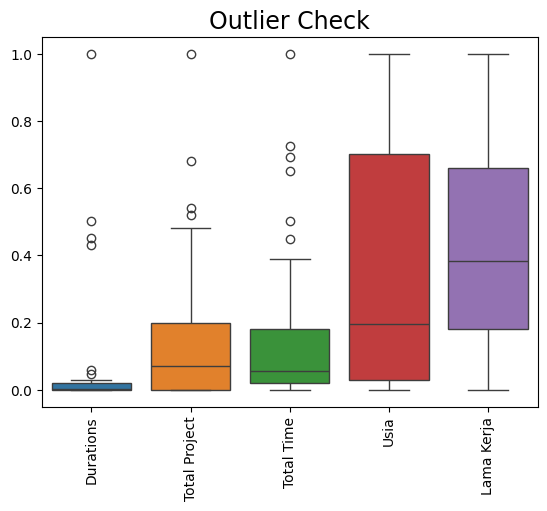

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#identifying with Boxplot
sns.boxplot(X_train_normalized[[ 'Durations', 'Total Project', 'Total Time', 'Usia', 'Lama Kerja']])
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

handling outlier with IQR

### a. Durations

In [14]:
q1= X_train_normalized['Durations'].quantile(0.25)
q3= X_train_normalized['Durations'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0, 0.018570851836899473, 0.018570851836899473)

In [15]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.009285425918449736, 0.04642712959224868)

<Axes: ylabel='Durations'>

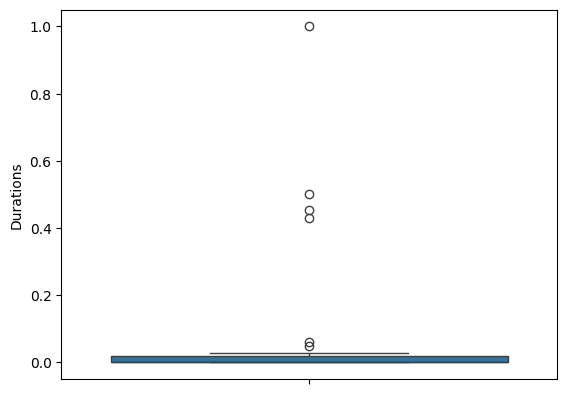

In [16]:
sns.boxplot(X_train_normalized['Durations'])

In [17]:
# find the outliers of df
X_train_normalized.loc[(X_train_normalized['Durations'] > upper_limit) | (X_train_normalized['Durations'] < lower_limit)]

,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,GrupResolver_enc
0,0.502220,0.00,0.060051,0.055556,0.802360,0.0,1.000000
9,0.430359,0.20,0.692207,0.000000,0.560472,0.0,0.857143
10,0.047235,0.00,0.020387,0.000000,0.321534,0.0,0.000000
14,0.452564,0.00,0.054109,0.111111,0.286136,0.5,0.428571
30,1.000000,0.02,0.449297,0.194444,0.696165,0.5,0.285714
31,0.059346,0.00,0.018986,1.000000,0.855457,1.0,1.000000


In [18]:
#trimming
X_train_nD= X_train_normalized.loc[(X_train_normalized['Durations'] < upper_limit) & (X_train_normalized['Durations'] > lower_limit)]
print('before removing outliers:', len(X_train_normalized))
print('after removing outliers:', len(X_train_nD))
print('outliers:', len(X_train_normalized) - len(X_train_nD))

before removing outliers: 36
after removing outliers: 30
outliers: 6


<Axes: ylabel='Durations'>

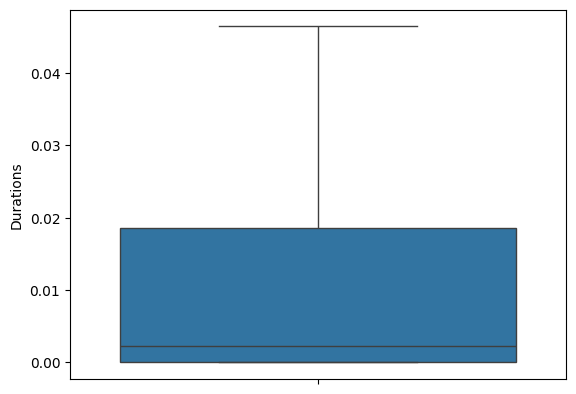

In [19]:
#capping: changing the outlier values to upper/lower limit values
X_train_nD = X_train_normalized.copy()
X_train_nD.loc[X_train_nD['Durations'] > upper_limit, 'Durations'] = upper_limit
X_train_nD.loc[X_train_nD['Durations'] < lower_limit, 'Durations'] = lower_limit
sns.boxplot(X_train_nD['Durations'])

<Axes: ylabel='Durations'>

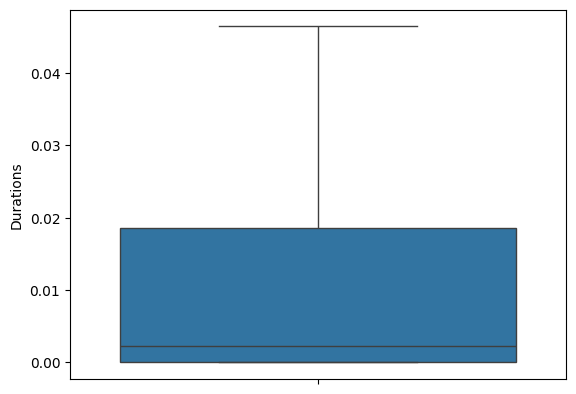

In [20]:
#capping: changing the outlier values to upper/lower limit values
X_train_nD = X_train_normalized.copy()
X_train_nD.loc[X_train_nD['Durations'] > upper_limit, 'Durations'] = upper_limit
X_train_nD.loc[X_train_nD['Durations'] < lower_limit, 'Durations'] = lower_limit
sns.boxplot(X_train_nD['Durations'])

### b. Total Project

In [21]:
q1= X_train_normalized['Total Project'].quantile(0.25)
q3= X_train_normalized['Total Project'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0, 0.2, 0.2)

In [22]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.10000000000000003, 0.5)

<Axes: ylabel='Total Project'>

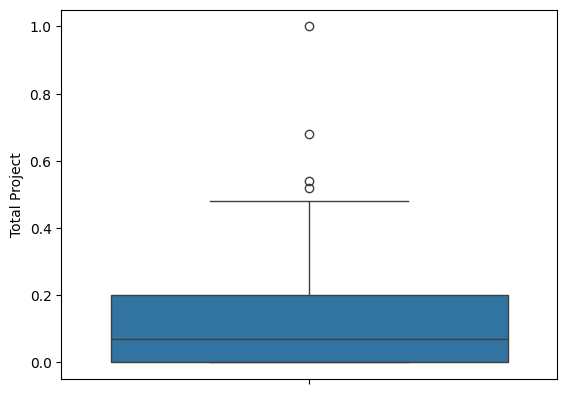

In [23]:
sns.boxplot(X_train_normalized['Total Project'])

In [24]:
# find the outliers of df
X_train_normalized.loc[(X_train_normalized['Total Project'] > upper_limit) | (X_train_normalized['Total Project'] < lower_limit)]

,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,GrupResolver_enc
7,0.009285,0.54,0.022561,0.138889,0.758112,0.5,0.571429
13,0.000000,1.00,0.180347,0.166667,0.064897,0.5,0.428571
17,0.000000,0.68,0.040002,0.027778,0.808260,0.0,0.571429
18,0.000404,0.52,0.062660,0.750000,0.911504,1.0,0.428571


In [25]:
#trimming
X_train_nP= X_train_normalized.loc[(X_train_normalized['Total Project'] < upper_limit) & (X_train_normalized['Total Project'] > lower_limit)]
print('before removing outliers:', len(X_train_normalized))
print('after removing outliers:', len(X_train_nP))
print('outliers:', len(X_train_normalized) - len(X_train_nP))

before removing outliers: 36
after removing outliers: 32
outliers: 4


<Axes: ylabel='Total Project'>

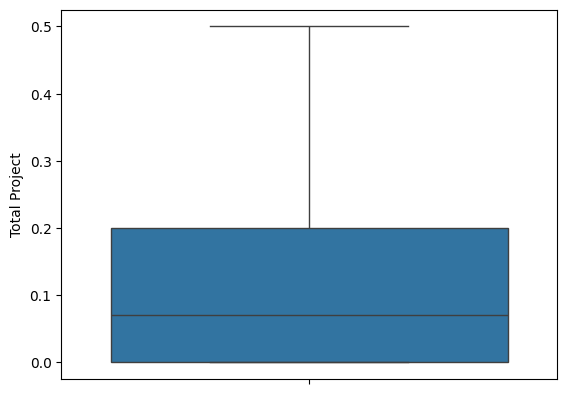

In [26]:
#capping: changing the outlier values to upper/lower limit values
X_train_nP = X_train_normalized.copy()
X_train_nP.loc[X_train_nP['Total Project'] > upper_limit, 'Total Project'] = upper_limit
X_train_nP.loc[X_train_nP['Total Project'] < lower_limit, 'Total Project'] = lower_limit
sns.boxplot(X_train_nP['Total Project'])

### c. Total Time

In [27]:
q1= X_train_normalized['Total Time'].quantile(0.25)
q3= X_train_normalized['Total Time'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.019457461713126234, 0.18151843084206967, 0.16206096912894344)

In [28]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.0615730228513455, 0.42460988453548487)

<Axes: ylabel='Total Time'>

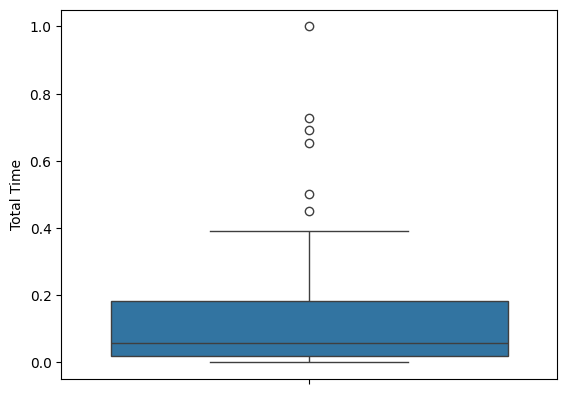

In [29]:
sns.boxplot(X_train_normalized['Total Time'])

In [30]:
# find the outliers of df
X_train_normalized.loc[(X_train_normalized['Total Time'] > upper_limit) | (X_train_normalized['Total Time'] < lower_limit)]

,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,GrupResolver_enc
2,0.009689,0.00,0.726074,0.194444,0.336283,0.5,0.285714
8,0.000404,0.00,0.651529,0.388889,0.634218,1.0,0.142857
9,0.430359,0.20,0.692207,0.000000,0.560472,0.0,0.857143
11,0.018167,0.04,1.000000,0.833333,0.415929,1.0,0.285714
30,1.000000,0.02,0.449297,0.194444,0.696165,0.5,0.285714
34,0.019782,0.00,0.500845,0.138889,0.002950,0.5,0.142857


In [31]:
#trimming
X_train_nT= X_train_normalized.loc[(X_train_normalized['Total Time'] < upper_limit) & (X_train_normalized['Total Time'] > lower_limit)]
print('before removing outliers:', len(X_train_normalized))
print('after removing outliers:', len(X_train_nT))
print('outliers:', len(X_train_normalized) - len(X_train_nT))

before removing outliers: 36
after removing outliers: 30
outliers: 6


<Axes: ylabel='Total Project'>

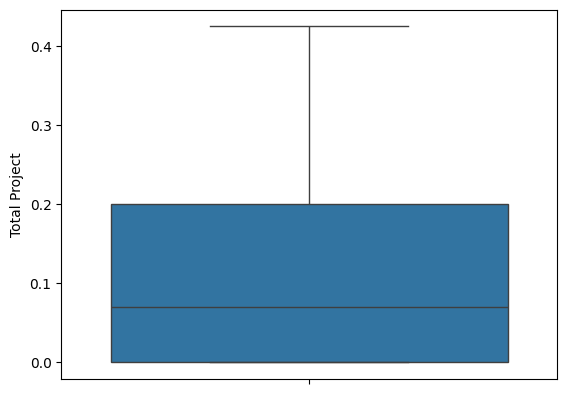

In [32]:
#capping: changing the outlier values to upper/lower limit values
X_train_nP = X_train_normalized.copy()
X_train_nP.loc[X_train_nP['Total Project'] > upper_limit, 'Total Project'] = upper_limit
X_train_nP.loc[X_train_nP['Total Project'] < lower_limit, 'Total Project'] = lower_limit

sns.boxplot(X_train_nP['Total Project'])

## Concating the Data Outliers

In [33]:
X_train = pd.concat([X_train_normalized, X_train_nD, X_train_nP, X_train_nT], axis=1)
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Durations         36 non-null     float64
 1   Total Project     36 non-null     float64
 2   Total Time        36 non-null     float64
 3   Usia              36 non-null     float64
 4   Lama Kerja        36 non-null     float64
 5   Kualifikasi_enc   36 non-null     float64
 6   GrupResolver_enc  36 non-null     float64
dtypes: float64(7)
memory usage: 2.1 KB


In [34]:
X_train.head()

,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,GrupResolver_enc
0,0.502220,0.00,0.060051,0.055556,0.802360,0.0,1.000000
1,0.008074,0.08,0.018745,0.000000,0.286136,0.0,0.857143
2,0.009689,0.00,0.726074,0.194444,0.336283,0.5,0.285714
3,0.000000,0.44,0.000000,0.000000,0.616519,0.0,0.714286
4,0.020993,0.08,0.340644,0.055556,0.392330,0.0,0.857143


## Model

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(X_train, y_train)


## Setup

In [35]:
import optuna
from sklearn.model_selection import cross_val_score
#model.get_params()

#param_grid = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [2, 4, 6, 8, 10, None],
#    'min_samples_split': [2, 10, 20],
#    'min_samples_leaf': [1, 5, 10],
#    'max_features': [None, 'sqrt', 'log2'],
#    'random_state': [None, 5, 10, 20, 42, 100],
#    'ccp_alpha': [None, 0.0, 0.01]
#}

# def objective(trial):
#     # Suggest values for the hyperparameters
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
#     max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
#     max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
# # Create the model
#     model = DecisionTreeClassifier(
#         criterion=criterion,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         max_features=max_features,
#         random_state=42
#     )
#  # Evaluate the model using cross-validation
#     scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
#     accuracy = scores.mean()
    
#     return accuracy


# Data Eval

In [36]:
predictions = model.predict(X_test)
#predictions

# Create a study and optimize the objective function
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=100)

In [37]:
# Print the best parameters and the corresponding accuracy
#print("Best parameters found: ", study.best_params)
#print("Best cross-validation accuracy: ", study.best_value)

In [38]:
# Train the best model on the full training set
#best_model = DecisionTreeClassifier(**study.best_params, random_state=42)
#best_model.fit(X_train, y_train)

In [39]:
# Evaluate the model on the test set
#test_accuracy = best_model.score(X_test, y_test)
#print("Test set accuracy: ", test_accuracy)

In [40]:
model.predict_proba(X_test)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.3

In [42]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, predictions, labels= [0,1])